In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import tensorflow as tf

In [23]:
x_data = np.linspace(0.0,10.0,1000000)

In [24]:
noise = np.random.randn(len(x_data))

In [25]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [26]:
noise 

array([-0.20844396,  0.0265929 , -0.41988601, ...,  0.39257271,
       -2.61148535, -0.83051417])

y = mx +b 

b = 5

In [27]:
y_true = (0.5 * x_data) + 5 + noise

In [28]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [29]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [30]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [31]:
y_df.head()

,Y
0,4.791556
1,5.026598
2,4.580124
3,4.208458
4,5.392366


In [32]:
my_data = pd.concat([x_df,y_df],axis=1)

In [33]:
my_data

,X Data,Y
0,0.00000,4.791556
1,0.00001,5.026598
2,0.00002,4.580124
3,0.00003,4.208458
4,0.00004,5.392366
...,...,...
999995,9.99996,10.289315
999996,9.99997,8.846613
999997,9.99998,10.392563
999998,9.99999,7.388510


<Axes: xlabel='X Data', ylabel='Y'>

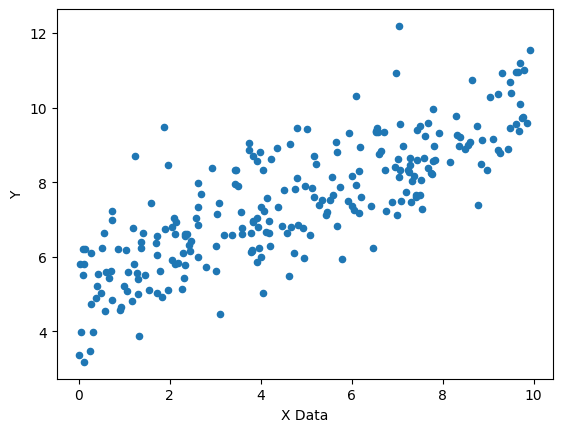

In [34]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [35]:
batch_size = 8 

In [36]:
np.random.randn(2)

array([-0.96345919,  0.32185913])

In [37]:
m = tf.Variable(0.43)
b = tf.Variable(0.02)


In [38]:
# tf.compat.v1.disable_eager_execution()
xph = tf.compat.v1.placeholder(tf.float32, [batch_size])

In [39]:
yph = tf.compat.v1.placeholder(tf.float32, [batch_size])

In [40]:
y_model = m*xph + b

In [41]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [42]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [43]:
init = tf.compat.v1.global_variables_initializer()

In [44]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [45]:
model_m

0.54662347

In [46]:
model_b

4.8812923

In [47]:
y_hat = x_data*model_m + model_b

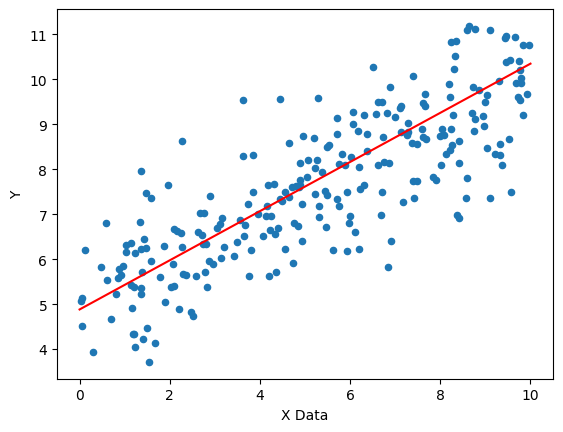

In [48]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In general, to use the estimator API we do the following 
-   Define a list of feature columns 
-   Create the estimator model 
-   Create a Data input function 
-   Call a train, evaluate, and predict methods on the estimator object 

# TF Estimator

In [49]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [50]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\niarestr\\AppData\\Local\\Temp\\tmpld95syd3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker',

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [53]:
print(x_train.shape)

(700000,)


In [54]:
x_eval.shape

(300000,)

In [55]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True
)


Instructions for updating:
Use tf.keras instead.


In [56]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False
)

In [57]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False
)

In [58]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use tf.keras instead.

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.

INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [59]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.

INFO:tensorflow:Starting evaluation at 2024-02-09T08:37:26
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\niarestr\AppData\Local\Temp\tmpld95syd3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 0.63234s
INFO:tensorflow:Finished evaluation at 2024-02-09-08:37:27
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1031886, global_step = 1000, label/mean = 

In [60]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-02-09T08:38:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\niarestr\AppData\Local\Temp\tmpld95syd3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 0.70063s
INFO:tensorflow:Finished evaluation at 2024-02-09-08:38:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1119667, global_step = 1000, label/mean = 7.4708376, loss = 1.1119667, prediction/mean = 7.4

In [61]:
print("train metrics: {}".format(train_metrics))
print(train_metrics)

train metrics: {'average_loss': 1.1031886, 'label/mean': 7.502661, 'loss': 1.1031886, 'prediction/mean': 7.4481893, 'global_step': 1000}
{'average_loss': 1.1031886, 'label/mean': 7.502661, 'loss': 1.1031886, 'prediction/mean': 7.4481893, 'global_step': 1000}


In [62]:
print("eval metrics: {}".format(eval_metrics))

eval metrics: {'average_loss': 1.1119667, 'label/mean': 7.4708376, 'loss': 1.1119667, 'prediction/mean': 7.426345, 'global_step': 1000}


In [63]:
brand_new_data = np.linspace(0,10,10)
inpunt_fn_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [66]:
list(estimator.predict(input_fn=inpunt_fn_predict))

INFO:tensorflow:Calling model_fn.


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\niarestr\AppData\Local\Temp\tmpld95syd3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4241147], dtype=float32)},
 {'predictions': array([5.095829], dtype=float32)},
 {'predictions': array([5.7675433], dtype=float32)},
 {'predictions': array([6.4392576], dtype=float32)},
 {'predictions': array([7.110972], dtype=float32)},
 {'predictions': array([7.782686], dtype=float32)},
 {'predictions': array([8.4544], dtype=float32)},
 {'predictions': array([9.126114], dtype=float32)},
 {'predictions': array([9.797829], dtype=float32)},
 {'predictions': array([10.469543], dtype=float32)}]

In [67]:
predictions = []

for pred in estimator.predict(input_fn=inpunt_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\niarestr\AppData\Local\Temp\tmpld95syd3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [68]:
predictions

[array([4.4241147], dtype=float32),
 array([5.095829], dtype=float32),
 array([5.7675433], dtype=float32),
 array([6.4392576], dtype=float32),
 array([7.110972], dtype=float32),
 array([7.782686], dtype=float32),
 array([8.4544], dtype=float32),
 array([9.126114], dtype=float32),
 array([9.797829], dtype=float32),
 array([10.469543], dtype=float32)]

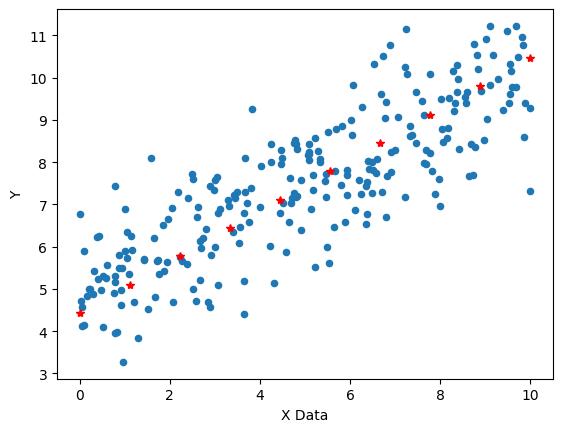

In [71]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')